In [1]:
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
election2vec = w2v.Word2Vec.load(os.path.join("trained", "electionTweets.w2v"))

tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

all_word_vectors_matrix = election2vec.syn0

all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)


In [3]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[election2vec.vocab[word].index])
            for word in election2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

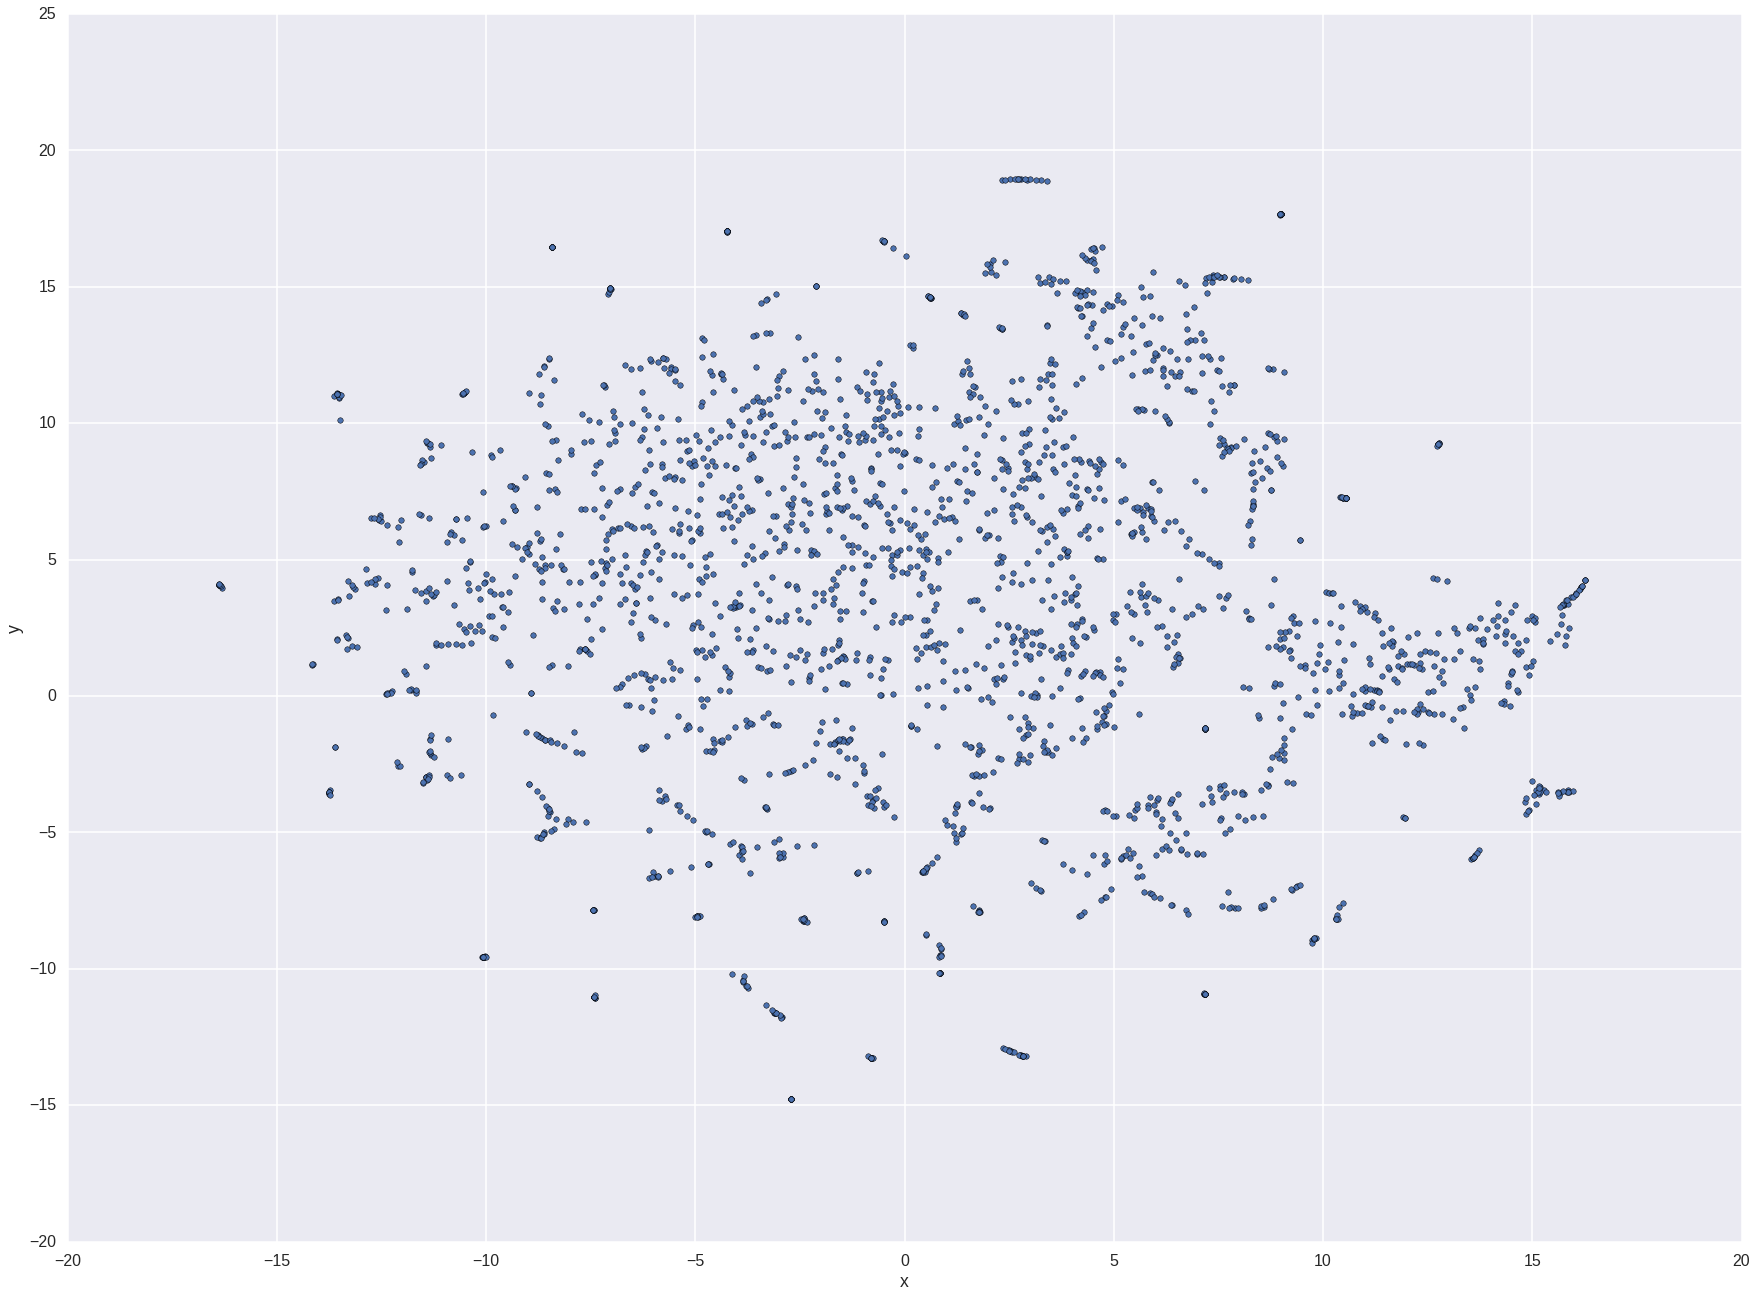

In [4]:
sns.set_context("poster")

points.plot.scatter("x", "y", s=30, figsize=(30, 22))

plt.show()


In [5]:
def plot_region(x_bounds, y_bounds):
    try:
        slice = points[
            (x_bounds[0] <= points.x) &
            (points.x <= x_bounds[1]) & 
            (y_bounds[0] <= points.y) &
            (points.y <= y_bounds[1])
        ]

        ax = slice.plot.scatter("x", "y", s=90, figsize=(10, 8))
        for i, point in slice.iterrows():
            ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)
    except:
        print("No word in this region")
    

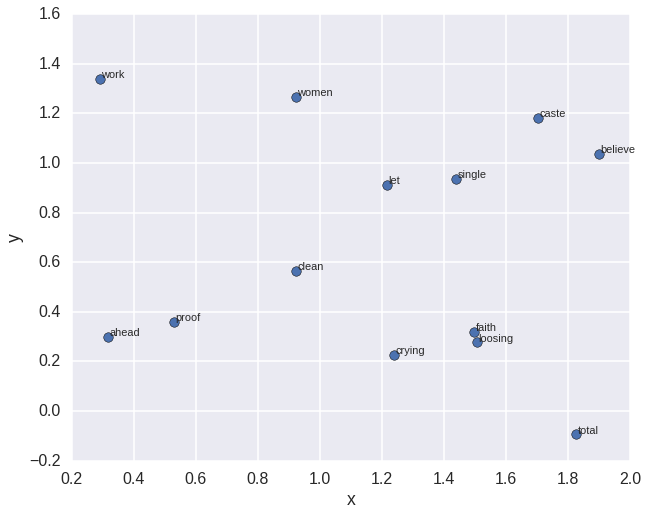

In [6]:
plot_region(x_bounds=(0,1.9), y_bounds=(-0.1, 1.5))

plt.show()

In [8]:
def semantic_word(word1, word2):
    w = election2vec.most_similar_cosmul([word1], [word2])
    return str("{} and {} --> {}".format(word1, word2,w[0][0]))


print(semantic_word("punjab", "election"))

print(semantic_word("goa", "election"))

print(semantic_word("winner", "election"))

print(semantic_word("vote", "election"))

print(semantic_word("modi", "india"))

print(semantic_word("modi", "kejriwal"))

print(semantic_word("aap", "bjp"))

print(semantic_word("bjp", "congress"))

print(semantic_word("bjp", "sad"))

print(semantic_word("india", "election"))

punjab and election --> vote
goa and election --> vote
winner and election --> aap
vote and election --> voters
modi and india --> world
modi and kejriwal --> derecognize
aap and bjp --> volunteers
bjp and congress --> sad
bjp and sad --> agenda
india and election --> vote


In [10]:
election2vec.most_similar("election")

[('rally', 0.8586426973342896),
 ('sadhavi', 0.8440576791763306),
 ('read', 0.8421435356140137),
 ('political', 0.8313291668891907),
 ('ji', 0.8279244303703308),
 ('defined', 0.8237112164497375),
 ('uttar', 0.8224272727966309),
 ('addresses', 0.8223237991333008),
 ('meerut', 0.819432258605957),
 ('perfectly', 0.818512499332428)]